In [19]:
import numpy as np
import pandas as pd
# Import machine learning methods

from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from sklearn.ensemble import AdaBoostClassifier

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import auc, roc_curve, RocCurveDisplay, f1_score, precision_score, \
                            recall_score, confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(42)

In [4]:
download_required = False

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='../datasets/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_titanic_data.csv', index=False)

In [5]:
data = pd.read_csv('../datasets/processed_titanic_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,3.0,28.0,0.0,0.0,8.4583,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653,0.002245,0.771044,...,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210,0.047351,0.420397,...,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data
# inplace=True means change the dataframe itself - don't create a copy with this column dropped

data.drop('PassengerId', inplace=True, axis=1)

## Divide into X (features) and y (labels)

In [9]:
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

## Divide into training and tets sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Fit decision tree model

In [22]:
model = XGBClassifier(random_state=42)
model = model.fit(X_train,y_train)

## Predict values

In [12]:
# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Calculate accuracy

In [13]:
# The shorthand below says to check each predicted y value against the actual
# y value in the training data.  This gives a list of True and False values
# for each prediction, where True indicates the predicted value matches the
# actual value.  Then we take the mean of these Boolean values, which gives
# us a proportion (where if all values were True, the proportion would be 1.0)
# If you want to see why that works, just uncomment the following line of code
# to see what y_pred_train == y_train is doing.
# print (y_pred_train == y_train)
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')

Accuracy of predicting training data = 0.9730538922155688
Accuracy of predicting test data = 0.8071748878923767


In [14]:
# Show first ten predicted classes
classes = model.predict(X_test)
classes[0:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [15]:
# Show first ten predicted probabilities
probabilities = model.predict_proba(X_test)
probabilities[0:10]

array([[0.86352104, 0.13647896],
       [0.7883349 , 0.2116651 ],
       [0.5199659 , 0.48003414],
       [0.00145131, 0.9985487 ],
       [0.07196659, 0.9280334 ],
       [0.01444411, 0.9855559 ],
       [0.22169638, 0.7783036 ],
       [0.99416023, 0.00583977],
       [0.67432725, 0.32567278],
       [0.00534749, 0.9946525 ]], dtype=float32)

## Calculate other metrics

In [18]:
f1_score_xg = f1_score(y_test, y_pred_test, average='macro')
precision_score_xg = precision_score(y_test, y_pred_test, average='macro')
recall_score_xg = recall_score(y_test, y_pred_test, average='macro')

print (f'Accuracy of predicting test data = {accuracy_test}')
print (f'f1 score = {f1_score_xg}')
print (f'precision score = {recall_score_xg}')
print (f'recall score = {recall_score_xg}')

Accuracy of predicting test data = 0.8071748878923767
f1 score = 0.7978070637849236
precision score = 0.7961596511822908
recall score = 0.7961596511822908


In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       134
         1.0       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



# Comparing Performance

In [17]:
def train_and_run(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)

    print (f'Accuracy of predicting training data = {accuracy_train:.3f}')
    print (f'Accuracy of predicting test data = {accuracy_test:.3f}')

In [18]:
np.random.seed(42)

train_and_run(model = LogisticRegression())

Accuracy of predicting training data = 0.804
Accuracy of predicting test data = 0.807


c:\HSMA\_HSMA 6\Sammi's Sessions\h6_4e_boosted_trees\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
np.random.seed(42)

train_and_run(model = DecisionTreeClassifier(random_state=42))

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.758


In [20]:
np.random.seed(42)

train_and_run(model = RandomForestClassifier())

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.794


In [21]:
np.random.seed(42)

train_and_run(model = XGBClassifier())

Accuracy of predicting training data = 0.973
Accuracy of predicting test data = 0.807


#### Random Forest

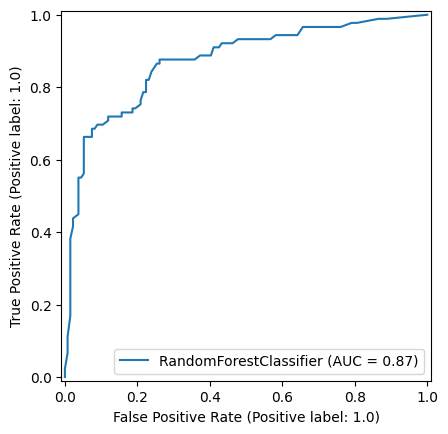

In [22]:
np.random.seed(42)

random_forest_model = RandomForestClassifier()
random_forest_model = random_forest_model.fit(X_train,y_train)

y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)

roc_curve_rf = RocCurveDisplay.from_estimator(
    random_forest_model, X_test, y_test
)

confusion_matrix_rf = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_rf
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_rf_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_rf,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


#### Decision Tree

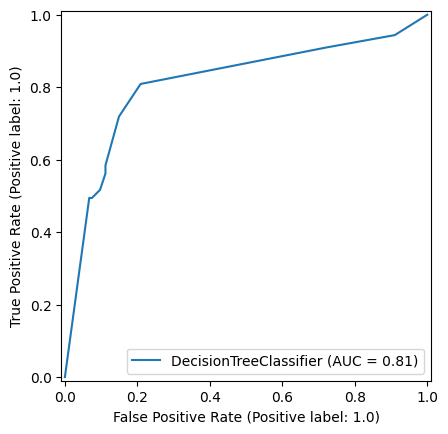

In [23]:
np.random.seed(42)

decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X_train,y_train)

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

roc_curve_dt = RocCurveDisplay.from_estimator(
    decision_tree_model, X_test, y_test
)

confusion_matrix_dt = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_dt_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


#### Logistic Regression

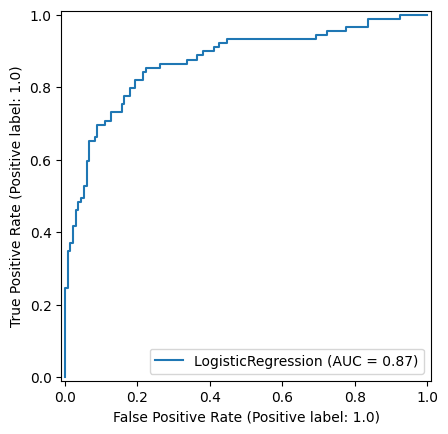

In [24]:
np.random.seed(42)

def standardise_data(X_train, X_test):

    # Initialise a new scaling object for normalising input data
    sc = StandardScaler()

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.fit_transform(X_test)

    return train_std, test_std

X_train_standardised, X_test_standardised = standardise_data(X_train, X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_standardised,y_train)

y_pred_train_lr = logistic_regression_model.predict(X_train_standardised)
y_pred_test_lr = logistic_regression_model.predict(X_test_standardised)

roc_curve_lr = RocCurveDisplay.from_estimator(
    logistic_regression_model, X_test_standardised, y_test
)

confusion_matrix_lr = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_lr_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


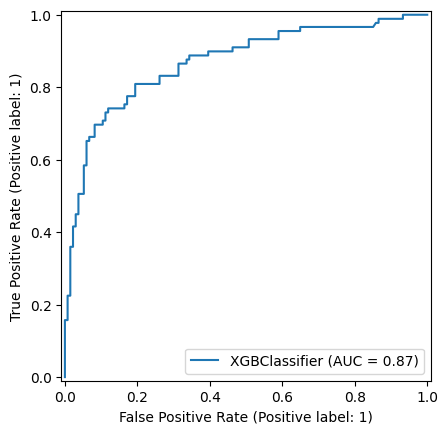

In [25]:
np.random.seed(42)

xgboost_model = XGBClassifier()
xgboost_model = xgboost_model.fit(X_train,y_train)

y_pred_train_xg = xgboost_model.predict(X_train)
y_pred_test_xg = xgboost_model.predict(X_test)

roc_curve_xg = RocCurveDisplay.from_estimator(
    xgboost_model, X_test, y_test
)

confusion_matrix_xg = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_xg
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_xg_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_xg,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


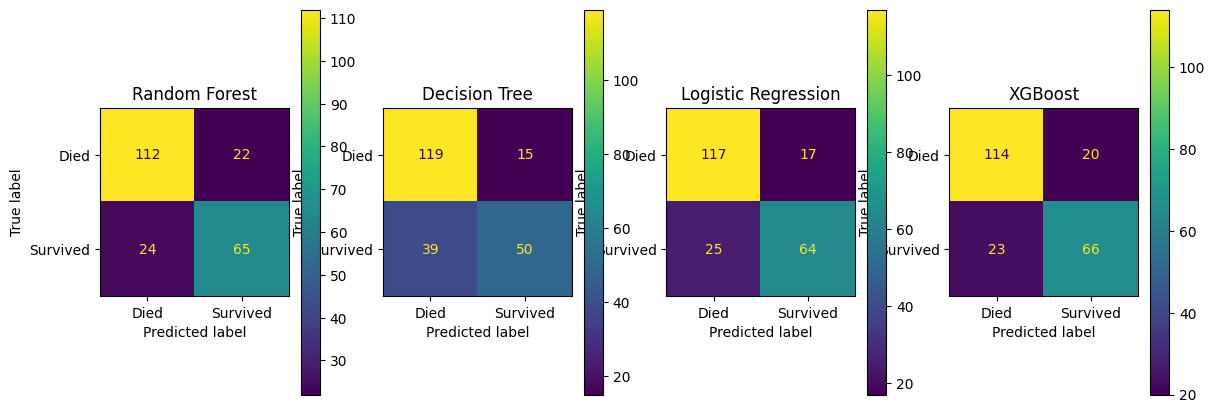

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 5))

confusion_matrix_lr.plot(ax=ax1)
ax1.title.set_text('Logistic Regression')

confusion_matrix_dt.plot(ax=ax2)
ax2.title.set_text('Decision Tree')

confusion_matrix_rf.plot(ax=ax3)
ax3.title.set_text('Random Forest')

confusion_matrix_xg.plot(ax=ax4)
ax4.title.set_text('XGBoost')


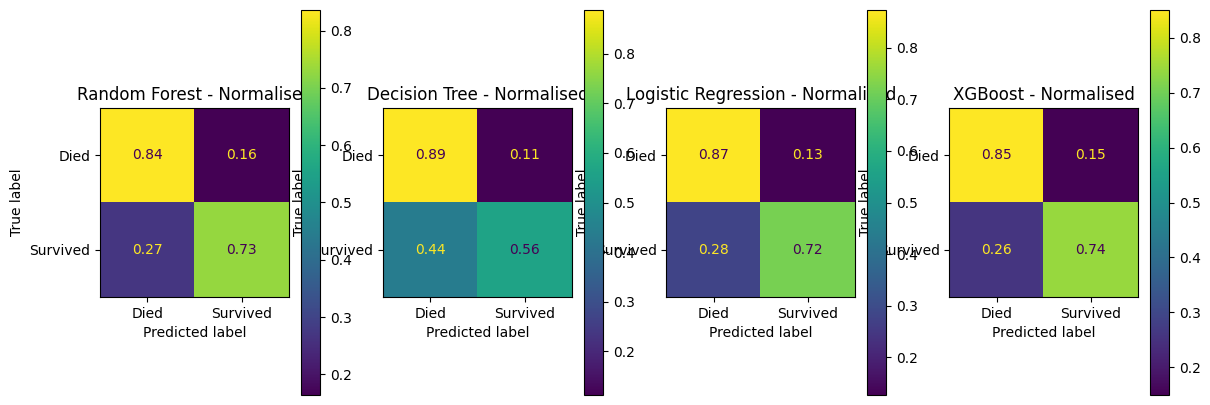

In [70]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 5))
confusion_matrix_rf_normalised.plot(ax=ax1)
ax1.title.set_text('Random Forest - Normalised')

confusion_matrix_dt_normalised.plot(ax=ax2)
ax2.title.set_text('Decision Tree - Normalised')

confusion_matrix_lr_normalised.plot(ax=ax3)
ax3.title.set_text('Logistic Regression - Normalised')

confusion_matrix_xg_normalised.plot(ax=ax4)
ax4.title.set_text('XGBoost - Normalised')

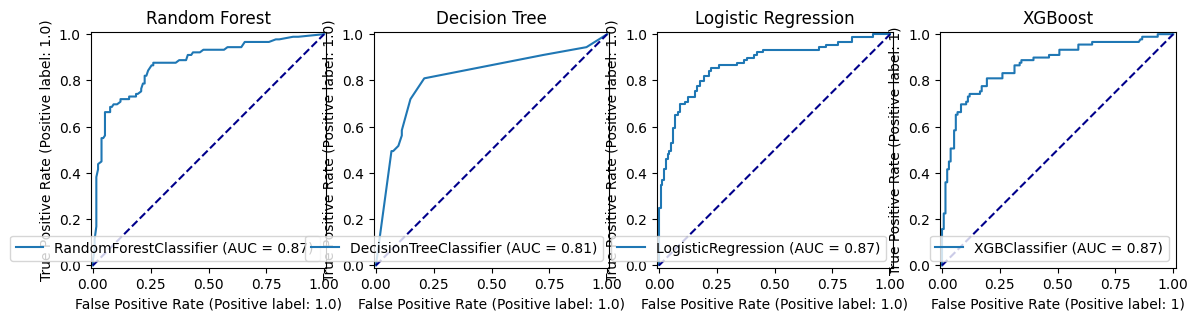

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 5))

roc_curve_rf.plot(ax=ax1)
ax1.title.set_text('Random Forest')
ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_dt.plot(ax=ax2)
ax2.title.set_text('Decision Tree')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_lr.plot(ax=ax3)
ax3.title.set_text('Logistic Regression')
ax3.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_xg.plot(ax=ax4)
ax4.title.set_text('XGBoost')
ax4.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# XGBoost - Parallel Computation

In [78]:
from datetime import datetime

### Time a standard xgboost training

In [82]:
np.random.seed(42)
start_at = datetime.now()
train_and_run(model = XGBClassifier())
print("Duration =", (datetime.now() - start_at))

Accuracy of predicting training data = 0.973
Accuracy of predicting test data = 0.807
Duration = 0:00:00.089040


### Time a parallel xgboost training

In [83]:
np.random.seed(42)
start_at = datetime.now()
train_and_run(model = XGBClassifier(nthread=-1))
print("Duration =", (datetime.now() - start_at))

Accuracy of predicting training data = 0.973
Accuracy of predicting test data = 0.807
Duration = 0:00:00.083743


## Hyperparameters

### n estimators (trees per forest)

In [85]:
accuracy_results = []

for i in range(10, 500, 10):
    model = model = XGBClassifier(n_estimators=i, random_state=42, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'n_estimators': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='n_estimators'),
        x='n_estimators', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>n_estimators=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
                          150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,
                          290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
                          430, 440, 450, 460, 470, 480, 490], dtype=int64),
              'xaxis': 'x',
              'y': array([0.9011976 , 0.93113772, 0.94161677, 0.9505988 , 0.95658683, 0.96556886,
                          0.96556886, 0.96556886, 0.97005988, 0.97305389, 0.9745509 , 0.9745509 ,
                          0.9760479 , 0.97754491, 0.97904192, 0.97904192, 0.97904192, 0.97904192,
                          0.97904192, 0.97904192, 0.97904192, 0.98053892, 0.98053892, 0.98053892,
                          0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892,
                          0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892,
                          0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892,
                          0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892, 0.98053892,
                          0.98053892]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>n_estimators=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
                          150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,
                          290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
                          430, 440, 450, 460, 470, 480, 490], dtype=int64),
              'xaxis': 'x',
              'y': array([0.84753363, 0.83408072, 0.82959641, 0.8206278 , 0.8206278 , 0.8161435 ,
                          0.8206278 , 0.81165919, 0.80717489, 0.80717489, 0.80269058, 0.80269058,
                          0.81165919, 0.79820628, 0.79820628, 0.79820628, 0.79820628, 0.79820628,
                          0.80269058, 0.80269058, 0.80269058, 0.80717489, 0.81165919, 0.80717489,
                          0.80717489, 0.80717489, 0.80717489, 0.80717489, 0.80269058, 0.80269058,
                          0.80269058, 0.80269058, 0.79820628, 0.80269058, 0.80269058, 0.80269058,
                          0.79372197, 0.79820628, 0.80269058, 0.79820628, 0.79372197, 0.79820628,
                          0.79820628, 0.79820628, 0.79820628, 0.79372197, 0.79820628, 0.79820628,
                          0.79820628]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'n_estimators'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [86]:
pd.DataFrame(accuracy_results).set_index("n_estimators").sort_values(by=["accuracy_test"], ascending=False)

,accuracy_train,accuracy_test
n_estimators,,
10,0.901198,0.847534
20,0.931138,0.834081
30,0.941617,0.829596
40,0.950599,0.820628
50,0.956587,0.820628
70,0.965569,0.820628
60,0.965569,0.816143
80,0.965569,0.811659
130,0.976048,0.811659


### n estimators (trees per forest) - with max depth of 5

In [91]:
accuracy_results = []

for i in range(10, 200, 10):
    model = XGBClassifier(n_estimators=i, random_state=42, max_depth=5, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'n_estimators': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='n_estimators'),
        x='n_estimators', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>n_estimators=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
                          150, 160, 170, 180, 190], dtype=int64),
              'xaxis': 'x',
              'y': array([0.8997006 , 0.91317365, 0.92664671, 0.93712575, 0.94161677, 0.95209581,
                          0.95658683, 0.96257485, 0.96407186, 0.96407186, 0.96856287, 0.97005988,
                          0.97305389, 0.97155689, 0.9745509 , 0.9760479 , 0.97754491, 0.97754491,
                          0.97754491]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>n_estimators=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
                          150, 160, 170, 180, 190], dtype=int64),
              'xaxis': 'x',
              'y': array([0.8206278 , 0.83856502, 0.84304933, 0.82959641, 0.82511211, 0.8206278 ,
                          0.8161435 , 0.8206278 , 0.8161435 , 0.8206278 , 0.81165919, 0.81165919,
                          0.80717489, 0.80269058, 0.79820628, 0.79820628, 0.79820628, 0.79820628,
                          0.80269058]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'n_estimators'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [93]:
pd.DataFrame(accuracy_results).set_index("n_estimators").sort_values(by=["accuracy_test"], ascending=False)

,accuracy_train,accuracy_test
n_estimators,,
30,0.926647,0.843049
20,0.913174,0.838565
40,0.937126,0.829596
50,0.941617,0.825112
10,0.899701,0.820628
80,0.962575,0.820628
100,0.964072,0.820628
60,0.952096,0.820628
70,0.956587,0.816143


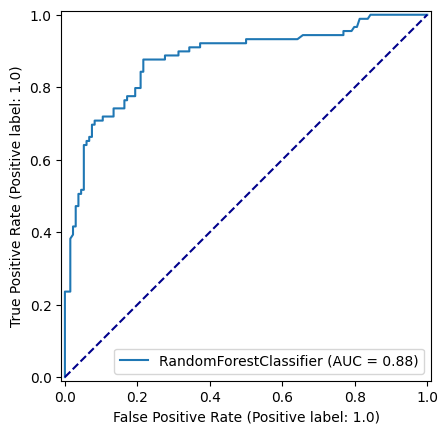

In [94]:
np.random.seed(42)

best_n_estimators = pd.DataFrame(accuracy_results).sort_values(by=["accuracy_test"], ascending=False).head(1)['n_estimators'].values[0]

model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, max_depth=8)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

roc_curve = RocCurveDisplay.from_estimator(
    model, X_test, y_test
)

fig = roc_curve.figure_
ax = roc_curve.ax_


ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


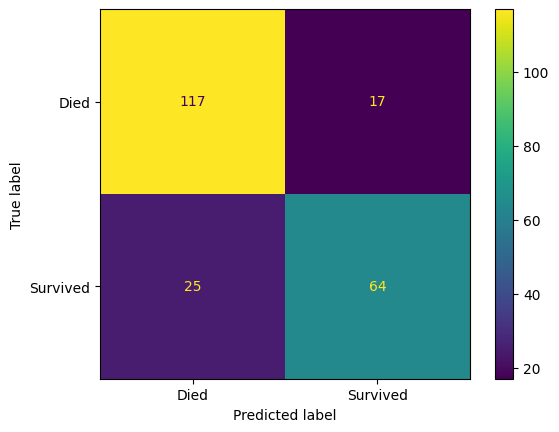

In [95]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test
        ),
        display_labels=["Died", "Survived"]
).plot()


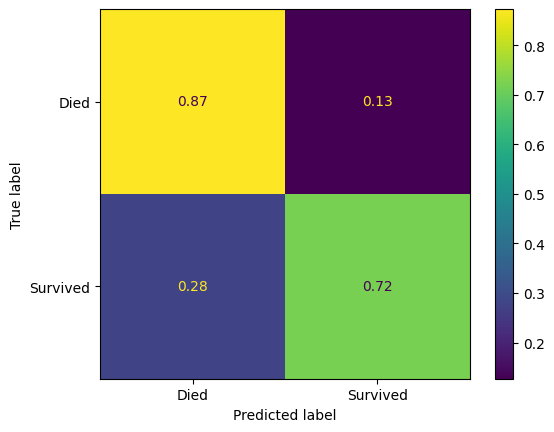

In [96]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
).plot()

## Learning Rate (ETA)

In [99]:
import numpy as np

In [105]:
accuracy_results = []

for i in np.arange(0.005, 0.2, 0.01):
    model = XGBClassifier(learning_rate=i, random_state=42, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'learning_rate': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='learning_rate'),
        x='learning_rate', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>learning_rate=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095,
                          0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195]),
              'xaxis': 'x',
              'y': array([0.84131737, 0.89221557, 0.90269461, 0.90868263, 0.91467066, 0.9251497 ,
                          0.93263473, 0.93413174, 0.93862275, 0.94011976, 0.94311377, 0.94610778,
                          0.94311377, 0.95209581, 0.95658683, 0.95958084, 0.95958084, 0.96107784,
                          0.96407186, 0.96407186]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>learning_rate=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095,
                          0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195]),
              'xaxis': 'x',
              'y': array([0.78923767, 0.83856502, 0.83856502, 0.83856502, 0.85201794, 0.83856502,
                          0.82959641, 0.82959641, 0.82511211, 0.8206278 , 0.82959641, 0.82511211,
                          0.8161435 , 0.8206278 , 0.8206278 , 0.8161435 , 0.82511211, 0.81165919,
                          0.8161435 , 0.8161435 ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'learning_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Min child weight

In [104]:
accuracy_results = []

for i in range(2, 15):
    model = XGBClassifier(min_child_weight=i, random_state=42, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'min_child_weight': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='min_child_weight'),
        x='min_child_weight', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>min_child_weight=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64),
              'xaxis': 'x',
              'y': array([0.96556886, 0.95359281, 0.93562874, 0.92814371, 0.92365269, 0.92065868,
                          0.92065868, 0.91167665, 0.8997006 , 0.89071856, 0.88323353, 0.88023952,
                          0.87874251]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>min_child_weight=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64),
              'xaxis': 'x',
              'y': array([0.80717489, 0.79372197, 0.82959641, 0.8206278 , 0.82959641, 0.82511211,
                          0.8206278 , 0.83408072, 0.82959641, 0.82959641, 0.83408072, 0.8161435 ,
                          0.80717489]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'min_child_weight'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Subsample

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [107]:
accuracy_results = []

for i in np.arange(0.05, 1, 0.05):
    model = XGBClassifier(subsample=i, random_state=42, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'subsample': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='subsample'),
        x='subsample', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>subsample=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
                          0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
              'xaxis': 'x',
              'y': array([0.8248503 , 0.85778443, 0.86976048, 0.89820359, 0.9251497 , 0.94161677,
                          0.93562874, 0.95808383, 0.95958084, 0.96257485, 0.97005988, 0.97005988,
                          0.96706587, 0.9760479 , 0.9760479 , 0.9760479 , 0.9760479 , 0.9745509 ,
                          0.97754491]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>subsample=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
                          0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
              'xaxis': 'x',
              'y': array([0.78475336, 0.80269058, 0.79372197, 0.80717489, 0.80717489, 0.81165919,
                          0.79820628, 0.80269058, 0.79820628, 0.8161435 , 0.79820628, 0.80717489,
                          0.81165919, 0.80269058, 0.78475336, 0.79820628, 0.79372197, 0.80269058,
                          0.79372197]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'subsample'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Colsample

In [108]:
accuracy_results = []

for i in np.arange(0.05, 1, 0.05):
    model = XGBClassifier(colsample_bytree=i, random_state=42, nthread=-1)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'colsample_bytree': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='colsample_bytree'),
        x='colsample_bytree', y='value', color='variable')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=accuracy_train<br>colsample_bytree=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_train',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_train',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
                          0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
              'xaxis': 'x',
              'y': array([0.88473054, 0.9011976 , 0.92664671, 0.94011976, 0.95359281, 0.95359281,
                          0.95958084, 0.96407186, 0.96107784, 0.96706587, 0.96556886, 0.97005988,
                          0.96706587, 0.97005988, 0.97005988, 0.97305389, 0.97155689, 0.97005988,
                          0.9760479 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=accuracy_test<br>colsample_bytree=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'accuracy_test',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'accuracy_test',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
                          0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
              'xaxis': 'x',
              'y': array([0.81165919, 0.79820628, 0.8161435 , 0.8206278 , 0.83408072, 0.8206278 ,
                          0.80717489, 0.8161435 , 0.83408072, 0.82511211, 0.81165919, 0.8161435 ,
                          0.81165919, 0.81165919, 0.80717489, 0.81165919, 0.80717489, 0.81165919,
                          0.80717489]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'colsample_bytree'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Num boost round

# AdaBoost

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)

# CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train,y_train)

# LightGBM

In [28]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

# Histogram based boosting classifiers

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)

HistGradientBoostingClassifier()